### Guided Practice: Logit Function and Odds

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def logit_func(odds):
    # uses a float (odds) and returns back the log odds (logit)
    return np.log(odds) #this is the natural log i.e. ln

def sigmoid_func(logit):  #logistic function
    # uses a float (logit) and returns back the probability
    return 1. / (1 + np.exp(-logit))

odds_set = [
    1.2/1
]

In [4]:
logit_func(odds_set[0])

0.18232155679395459

In [5]:
for odds in odds_set:
    print(sigmoid_func(logit_func(odds)))
    
#this translates the odds into probabilities
#i.e. odds of 5:1 means the event happens 5 in every 6 times = 0.83

0.545454545455


/Users/zoealdington/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


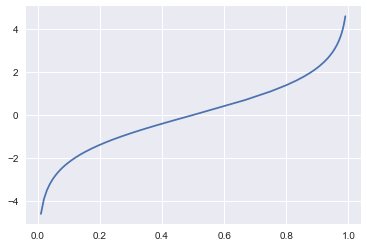

In [6]:
x1 = [float(i)/100 for i in range(0,101,1)]  #[0.01,0.02,...,1]
x2 = [x for x in range(2,100)]               #[2,3,...,99]
x = x1 + x2                                  #x=[0.01,0.02,...,2,3,...99]
y = sigmoid_func(logit_func(x))              #calculates the probabilities of these odds i.e. 0.01:1, ..., 99:1
logit = logit_func(x)                        #ln(x)=[ln(0.01),ln(0.02),...,ln(99)]
plt.plot(y,logit)                            #probabilities on x-axis, ln(x) values on y-axis

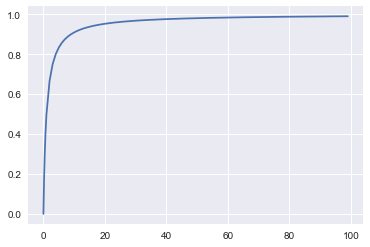

In [7]:
plt.plot(x,y)
#plots the odds on x (0.01,...,99) i.e. (0.01:1,...,99:1) vs the probability on y (p(0.01:1)=~0,...,p(99:1)=0.99)

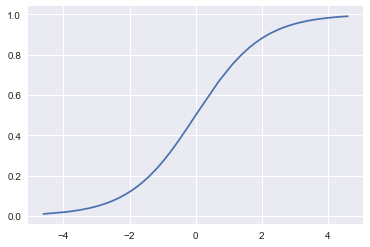

In [8]:
plt.plot(logit,y)
#plots ln(x) on x-axis and probabilities of the odds on y-axis

----

In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [10]:
lm = LogisticRegression() #can add a penalty for regularisation: l1 or l2

#if you have an inbalance in your dataset, e.g. 70% for 0 and 30% for 1, then you can add this into the model as 
#class_weight

df = pd.read_csv('collegeadmissions.csv')

In [11]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [12]:
df = df.join(pd.get_dummies(df['rank']))

In [13]:
df.head()

,admit,gre,gpa,rank,1,2,3,4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [14]:
lm.fit(df[['gre', 'gpa', 1, 2, 3,]], df['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
lm.predict_proba(df[['gre', 'gpa', 1, 2, 3,]]) #gives you a probability for each class

array([[ 0.81831149,  0.18168851],
       [ 0.73999949,  0.26000051],
       [ 0.40803412,  0.59196588],
       [ 0.73937525,  0.26062475],
       [ 0.77548266,  0.22451734],
       [ 0.58217651,  0.41782349],
       [ 0.50543376,  0.49456624],
       [ 0.71540221,  0.28459779],
       [ 0.77604811,  0.22395189],
       [ 0.60579341,  0.39420659],
       [ 0.68570416,  0.31429584],
       [ 0.55436619,  0.44563381],
       [ 0.42396126,  0.57603874],
       [ 0.60588034,  0.39411966],
       [ 0.44814096,  0.55185904],
       [ 0.79267236,  0.20732764],
       [ 0.6927379 ,  0.3072621 ],
       [ 0.82320101,  0.17679899],
       [ 0.56606748,  0.43393252],
       [ 0.51353641,  0.48646359],
       [ 0.78725265,  0.21274735],
       [ 0.62136711,  0.37863289],
       [ 0.75183996,  0.24816004],
       [ 0.72654406,  0.27345594],
       [ 0.58213961,  0.41786039],
       [ 0.40806971,  0.59193029],
       [ 0.48078818,  0.51921182],
       [ 0.77542153,  0.22457847],
       [ 0.57415809,

In [16]:
df['predict'] = lm.predict(df[['gre', 'gpa', 1, 2, 3,]]) #predicts the class
df['prob'] = lm.predict_proba(df[['gre', 'gpa', 1, 2, 3,]]).T[1] #probability of being in class=1
                                                                 #i.e. if this is <0.5 then the model predicts class=0
                                                                 #the model uses 0.5 as the threshold as a default
df

,admit,gre,gpa,rank,1,2,3,4,predict,prob
0,0,380,3.61,3,0,0,1,0,0,0.181689
1,1,660,3.67,3,0,0,1,0,0,0.260001
2,1,800,4.00,1,1,0,0,0,1,0.591966
3,1,640,3.19,4,0,0,0,1,0,0.260625
4,0,520,2.93,4,0,0,0,1,0,0.224517
5,1,760,3.00,2,0,1,0,0,0,0.417823
6,1,560,2.98,1,1,0,0,0,0,0.494566
7,0,400,3.08,2,0,1,0,0,0,0.284598
8,1,540,3.39,3,0,0,1,0,0,0.223952
9,0,700,3.92,2,0,1,0,0,0,0.394207


In [17]:
df[(df['predict'] == 0) & (df['prob']>= 0.5)]

,admit,gre,gpa,rank,1,2,3,4,predict,prob


In [18]:
print (lm.coef_)
print (lm.intercept_)
print (df.admit.mean())

[[  1.63913356e-03   4.33355414e-04   1.15220976e+00   5.14395668e-01
   -3.62326166e-02]]
[-2.09315184]
0.3175


The coefficients of the ranks (elements 3,4 and 5 above) get smaller and more negative as we move from rank 1 to rank 4

In [17]:
feature_set = df[['gre','gpa',1,2,3]]
print(lm.score(feature_set,df['admit']))

0.7


i.e. the accuracy of the model is 70%

Below is some code to walk through confusion matrices. It'll be useful for working through the Titanic problem.

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

Below the ROC curve is based on various thresholds: it shows with a false positive rate (x-axis) ~0, it also expects a true positive rate (y-axis) ~0 (the same, ish, for the top right hand of the figure).

The second chart, which does not play with thesholds, shows the one true TPR and FPR point, joined to 0,0 and 1,1.

The first chart will be more effective as you compare models and determine where the decision line should exist for the data. The second simplifies the first in case this idea of thresholds is confusing.

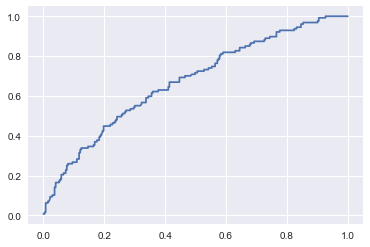

In [19]:
actuals = lm.predict(feature_set) 
probas = lm.predict_proba(feature_set)
plt.plot(roc_curve(df[['admit']], probas[:,1])[0], roc_curve(df[['admit']], probas[:,1])[1])

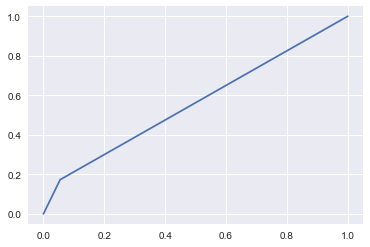

In [20]:
plt.plot(roc_curve(df[['admit']], actuals)[0], roc_curve(df[['admit']], actuals)[1])

Finally, you can use the `roc_auc_score` function to calculate the area under these curves (AUC).

In [21]:
roc_auc_score(df['admit'], lm.predict(feature_set))

0.55914164575581893

### Titanic Problem

** Goals **

1. Spend a few minutes determining which data would be most important to use in the prediction problem. You may need to create new features based on the data available. Consider using a feature selection aide in sklearn (calculates p value for each feature). But a worst case scenario; identify one or two strong features that would be useful to include in the model.
2. Spend 1-2 minutes considering which _metric_ makes the most sense to optimize. Accuracy? FPR or TPR? AUC? Given the business problem (understanding survival rate aboard the Titanic), why should you use this metric?
3. Build a tuned Logistic model. Be prepared to explain your design (including regularization), metric, and feature set in predicting survival using the tools necessary (such as a fit chart).

In [22]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
for col in ['Pclass','Sex']:
    titanic = titanic.join(pd.get_dummies(titanic[col]))

In [24]:
titanic.rename(columns={1:'class_1',2:'class_2',3:'class_3'},inplace=True)

In [25]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,class_1,class_2,class_3,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0,1,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0,1,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,1,0,1,0


In [26]:
lm.fit(titanic[['female', 'class_1', 'class_2']], titanic['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
lm.predict_proba(titanic[['female', 'class_1', 'class_2']])

array([[ 0.891396  ,  0.108604  ],
       [ 0.10507974,  0.89492026],
       [ 0.40200859,  0.59799141],
       ..., 
       [ 0.40200859,  0.59799141],
       [ 0.58908117,  0.41091883],
       [ 0.891396  ,  0.108604  ]])

In [28]:
titanic['predict'] = lm.predict(titanic[['female', 'class_1', 'class_2']]) 
titanic['prob'] = lm.predict_proba(titanic[['female', 'class_1', 'class_2']]).T[1]
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,class_1,class_2,class_3,female,male,predict,prob
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1,0,0.108604
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,1,0.894920
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0,1,0.597991
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0,1,0.894920
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,0.108604
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0,1,0,1,0,0.108604
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,0,0,1,0,0.410919
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0,1,0,1,0,0.108604
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0,1,1,0,1,0.597991
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,1,0,1,0,1,0.792960


In [29]:
print (lm.coef_)
print (lm.intercept_)
print (titanic.Survived.mean())

[[ 2.50218343  1.7449122   0.94575486]]
[-2.10508049]
0.3838383838383838


In [30]:
feature_set = titanic[['female', 'class_1', 'class_2']]
print(lm.score(feature_set,titanic['Survived']))

0.786756453423


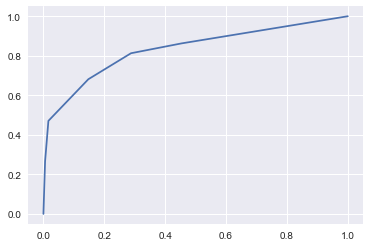

In [31]:
actuals = lm.predict(feature_set) 
probas = lm.predict_proba(feature_set)
plt.plot(roc_curve(titanic['Survived'], probas[:,1])[0], roc_curve(titanic['Survived'], probas[:,1])[1])

In [32]:
roc_auc_score(titanic['Survived'], lm.predict(feature_set))

0.76687278305052264

In [33]:
titanic['Age'] = titanic.groupby(["Sex", 'Pclass']).Age.transform(lambda x: x.fillna(x.mean()))
titanic['had_parents'] = titanic.Parch.apply(lambda x: 1 if x > 0 else 0)
titanic['had_siblings'] = titanic.SibSp.apply(lambda x: 1 if x > 0 else 0)

In [1]:
from sklearn import model_selection, cross_validation

feature_set = titanic[['female', 'class_1', 'class_2', 'Fare', 'Age', 'had_parents', 'had_siblings']]
gs = model_selection.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'balanced']},
    cv=cross_validation.KFold(n=len(titanic), n_folds=10),
    scoring='roc_auc')


gs.fit(feature_set, titanic.Survived)
gs.cv_results_
print(gs.best_estimator_)

#replaced grid_search by model_selection because grid_search will be deprecated
#replaced grid_scores_ by cv_results_ for same reason

/Users/zoealdington/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


NameError: name 'titanic' is not defined

In [37]:
mod = gs.best_estimator_
#mod.predict_proba()
titanic['prob'] = mod.predict_proba(feature_set).T[1]
titanic['predict'] = mod.predict(feature_set)
print(titanic[titanic.predict == 1].prob.min())
print(titanic[titanic.predict == 0].prob.max())

0.500866845816
0.497534513034


In [49]:
gs.grid_scores_
#gs.cv_results_

/Users/zoealdington/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.83905, std: 0.02899, params: {'C': 100000, 'class_weight': None},
 mean: 0.83889, std: 0.02936, params: {'C': 100000, 'class_weight': 'balanced'},
 mean: 0.83905, std: 0.02899, params: {'C': 10000, 'class_weight': None},
 mean: 0.83889, std: 0.02936, params: {'C': 10000, 'class_weight': 'balanced'},
 mean: 0.83905, std: 0.02899, params: {'C': 1000, 'class_weight': None},
 mean: 0.83889, std: 0.02936, params: {'C': 1000, 'class_weight': 'balanced'},
 mean: 0.83900, std: 0.02885, params: {'C': 100, 'class_weight': None},
 mean: 0.83889, std: 0.02936, params: {'C': 100, 'class_weight': 'balanced'},
 mean: 0.83905, std: 0.02914, params: {'C': 10, 'class_weight': None},
 mean: 0.83895, std: 0.02941, params: {'C': 10, 'class_weight': 'balanced'},
 mean: 0.84028, std: 0.02953, params: {'C': 1, 'class_weight': None},
 mean: 0.83961, std: 0.03021, params: {'C': 1, 'class_weight': 'balanced'},
 mean: 0.83686, std: 0.03289, params: {'C': 0.1, 'class_weight': None},
 mean: 0.83741, std: 0

In [51]:
roc_auc_score(titanic['Survived'], mod.predict(feature_set))

0.78039018310804331

In [52]:
roc_curve(titanic['Survived'], mod.predict(feature_set))

#only plots the values of three models with various thresholds

(array([ 0.      ,  0.143898,  1.      ]),
 array([ 0.        ,  0.70467836,  1.        ]),
 array([2, 1, 0]))

In [50]:
roc_auc_score(titanic['Survived'],mod.predict_proba(feature_set)[:,1])

0.8492181425025831

In [53]:
roc_curve(titanic['Survived'], mod.predict_proba(feature_set)[:,1])

(array([ 0.        ,  0.00182149,  0.00182149,  0.00182149,  0.00182149,
         0.00364299,  0.00364299,  0.00546448,  0.00546448,  0.00728597,
         0.00728597,  0.00728597,  0.00728597,  0.00910747,  0.00910747,
         0.00910747,  0.00910747,  0.01092896,  0.01092896,  0.01275046,
         0.01275046,  0.01275046,  0.01457195,  0.01457195,  0.01457195,
         0.01457195,  0.01821494,  0.01821494,  0.02003643,  0.02003643,
         0.02367942,  0.02367942,  0.02550091,  0.02550091,  0.03096539,
         0.03096539,  0.03278689,  0.03278689,  0.03825137,  0.03825137,
         0.04189435,  0.04189435,  0.04371585,  0.04371585,  0.04553734,
         0.04553734,  0.04553734,  0.04735883,  0.04735883,  0.04918033,
         0.04918033,  0.05100182,  0.05100182,  0.05282332,  0.0564663 ,
         0.0564663 ,  0.0564663 ,  0.0582878 ,  0.0582878 ,  0.06375228,
         0.06375228,  0.06739526,  0.06739526,  0.06739526,  0.06739526,
         0.07285974,  0.07285974,  0.07650273,  0.0

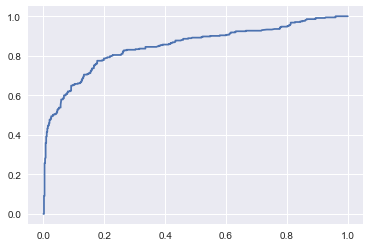

In [40]:
actuals = gs.predict(feature_set) 
probas = gs.predict_proba(feature_set)
plt.plot(roc_curve(titanic[['Survived']], probas[:,1])[0], roc_curve(titanic[['Survived']], probas[:,1])[1])